### 215537E


### Question 1

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os

#### a) b)

In [7]:

# 1. Load the runway image
img = cv.imread('runway.png', cv.IMREAD_GRAYSCALE)

gamma_05 = 0.5
table_a = np.array([((i / 255.0) ** gamma_05) * 255 for i in np.arange(0, 256)]).astype("uint8")
img_a = cv.LUT(img, table_a)

gamma_20 = 2.0
table_b = np.array([((i / 255.0) ** gamma_20) * 255 for i in np.arange(0, 256)]).astype("uint8")
img_b = cv.LUT(img, table_b)

#### Visualization

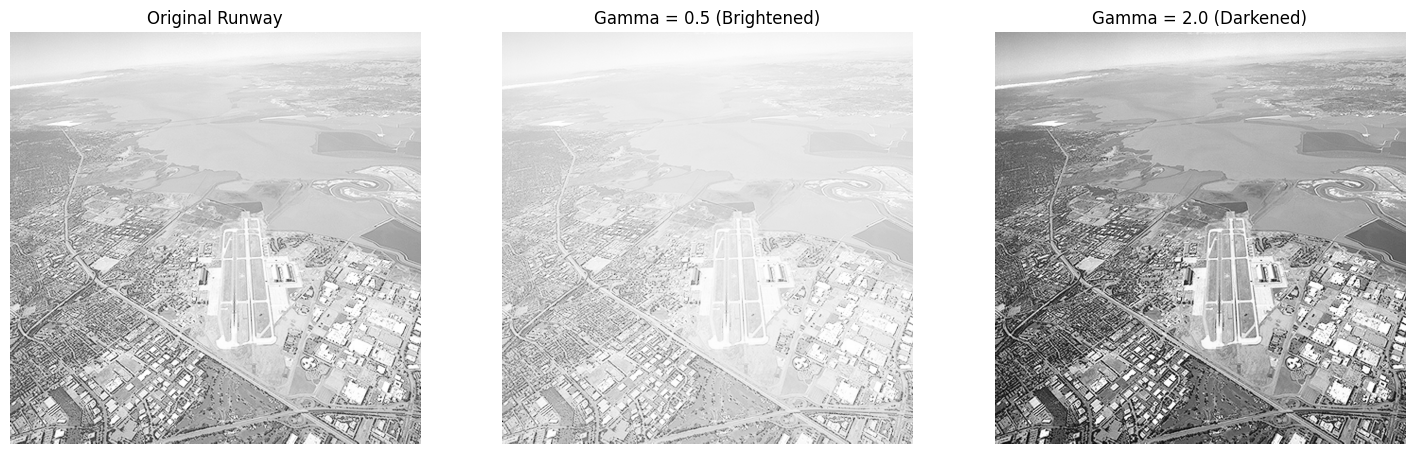

In [14]:
# Visualization
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    
ax[0].imshow(img, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Runway')
    
ax[1].imshow(img_a, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Gamma = 0.5 (Brightened)')
    
ax[2].imshow(img_b, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Gamma = 2.0 (Darkened)')

for a in ax:
    a.axis('off')
plt.show()


**Gamma = 0.5 (Brightening):** When , the transformation curve "bows upward". This maps a narrow range of dark input pixels to a wider range of output pixels, effectively **enhancing detail in the shadows** and brightening the overall image.



**Gamma = 2.0 (Darkening):** When , the curve "bows downward". This compresses dark intensities and stretches highlights, resulting in a **darker image** with higher contrast in the bright regions.


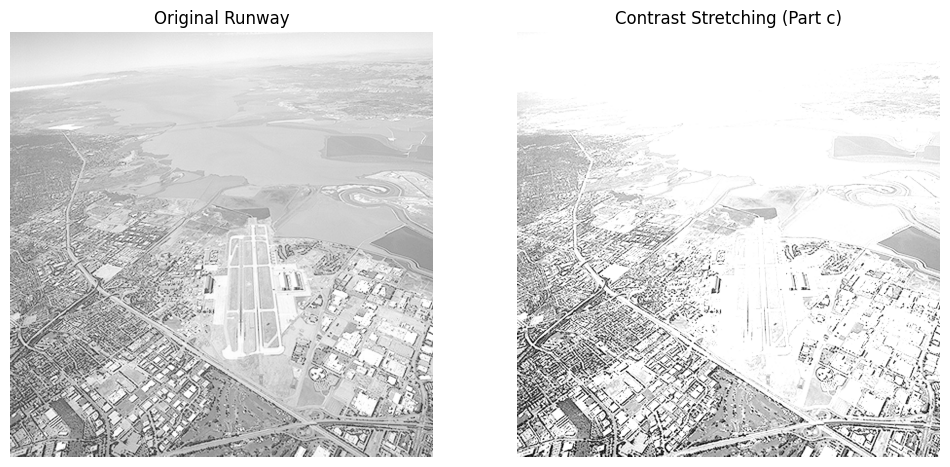

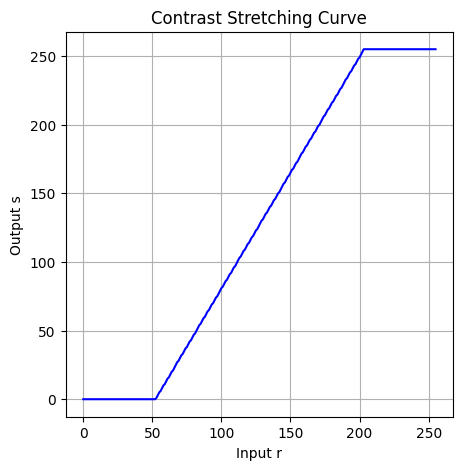

In [15]:

# From 0 to 51 (r < 0.2)
t1 = np.linspace(0, 0, 52).astype('uint8')
# From 52 to 204 (0.2 <= r <= 0.8)
t2 = np.linspace(0, 255, 204 - 52).astype('uint8')
# From 205 to 255 (r > 0.8)
t3 = np.linspace(255, 255, 256 - 204).astype('uint8')

transform = np.concatenate((t1, t2, t3), axis=0).astype('uint8')

img_c = cv.LUT(img, transform)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title('Original Runway')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_c, cmap='gray', vmin=0, vmax=255)
plt.title('Contrast Stretching (Part c)')
plt.axis('off')

plt.show()

r_vals = np.arange(256)
plt.figure(figsize=(5, 5))
plt.plot(r_vals, transform, 'b')
plt.title('Contrast Stretching Curve')
plt.xlabel('Input r')
plt.ylabel('Output s')
plt.grid(True)
plt.show()

The intensities in the middle range are linearly stretched to span the entire 8-bit range. This significantly increases the contrast of the runway features, making them stand out sharply against the background, though it "clips" details in the extreme shadows and highlights.


### Question 2

C:\Users\buwan\AppData\Local\Temp\ipykernel_8064\2283101431.py:27: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  ax[1, 0].hist(l_channel.ravel(), 256, [0, 256], color='black')
C:\Users\buwan\AppData\Local\Temp\ipykernel_8064\2283101431.py:29: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  ax[1, 1].hist(l_corrected.ravel(), 256, [0, 256], color='black')


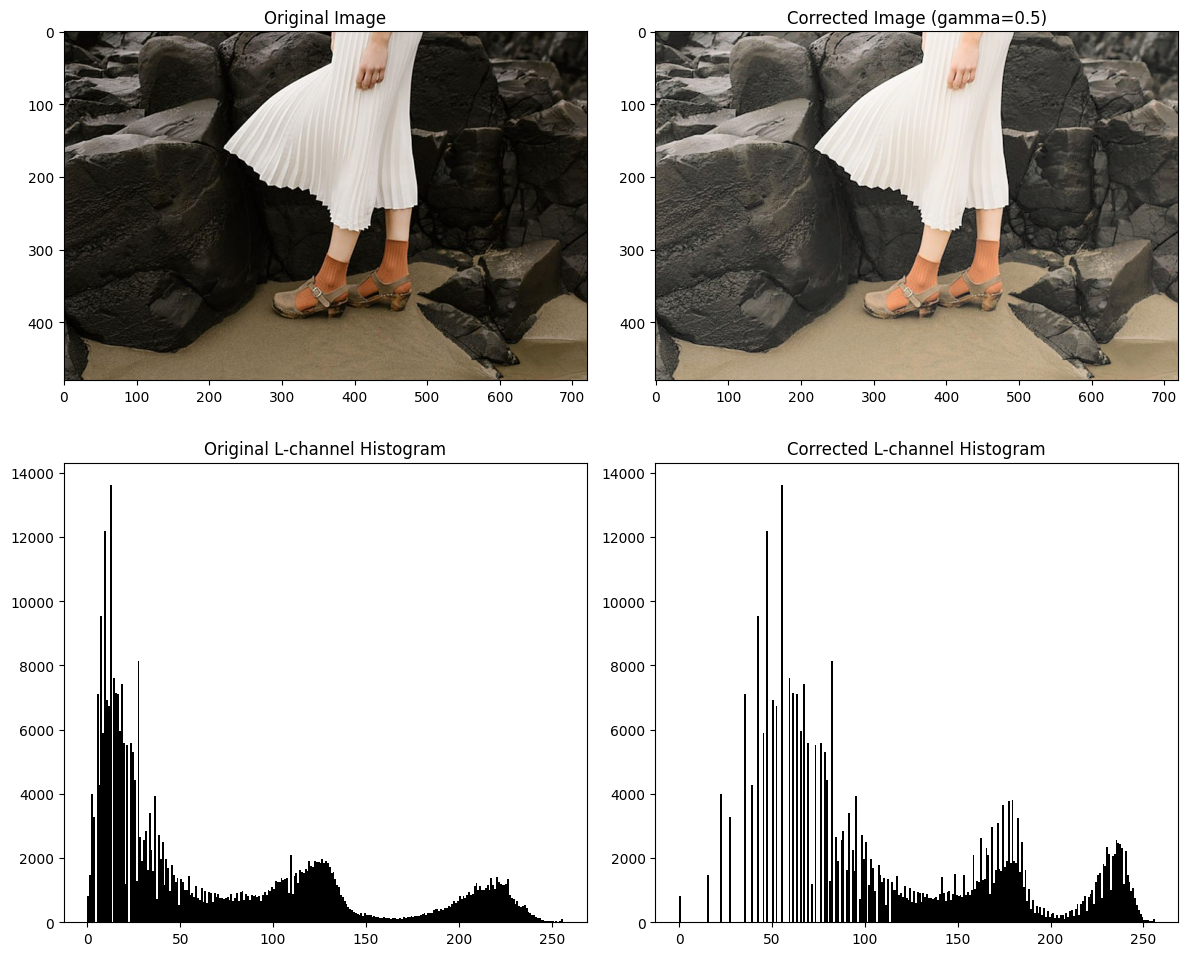

In [17]:

img = cv.imread('highlights_and_shadows.jpg') 


lab_img = cv.cvtColor(img, cv.COLOR_BGR2Lab)
l_channel, a_channel, b_channel = cv.split(lab_img)


# gamma = 0.5 to brighten the dark image
gamma = 0.5 
table = np.array([((i / 255.0) ** gamma) * 255 for i in range(256)]).astype("uint8")
l_corrected = cv.LUT(l_channel, table)


lab_corrected = cv.merge([l_corrected, a_channel, b_channel])
img_corrected = cv.cvtColor(lab_corrected, cv.COLOR_Lab2BGR)


fig, ax = plt.subplots(2, 2, figsize=(12, 10))


ax[0, 0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0, 0].set_title('Original Image')
ax[0, 1].imshow(cv.cvtColor(img_corrected, cv.COLOR_BGR2RGB))
ax[0, 1].set_title(f'Corrected Image (gamma={gamma})')


ax[1, 0].hist(l_channel.ravel(), 256, [0, 256], color='black')
ax[1, 0].set_title('Original L-channel Histogram')
ax[1, 1].hist(l_corrected.ravel(), 256, [0, 256], color='black')
ax[1, 1].set_title('Corrected L-channel Histogram')

for row in ax:
    for a in row:
        a.axis('on') 
plt.tight_layout()
plt.show()

To brighten the image while preserving its natural colors, gamma correction () is applied specifically to the **L (Lightness) plane** in the ** color space**. This approach increases visibility in dark regions by adjusting intensity while keeping the **a** and **b** chrominance channels untouched, preventing any artificial color distortion.

The L-channel histograms confirm this improvement, showing a clear shift from a dark-heavy distribution to a more balanced range. The originally compressed dark pixels are stretched toward the middle and higher intensities, successfully revealing hidden details in the shadows while maintaining a realistic final appearance.

### Question 3


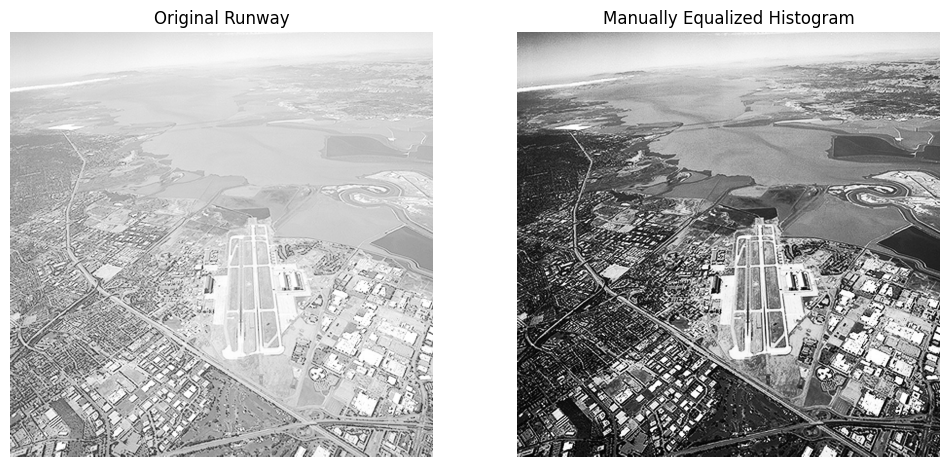

In [20]:

def manual_hist_equalization(f):
    M, N = f.shape
    L = 256
    hist, _ = np.histogram(f.flatten(), bins=L, range=[0, L])
    cdf = hist.cumsum()
    t = np.array([(L - 1) / (M * N) * cdf[k] for k in range(L)], dtype=np.uint8)
    g = t[f]
    return g

f = cv.imread('runway.png', cv.IMREAD_GRAYSCALE)

g_manual = manual_hist_equalization(f)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Runway')
ax[0].axis('off')

ax[1].imshow(g_manual, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Manually Equalized Histogram')
ax[1].axis('off')

plt.show()


Histogram equalization was implemented to automatically enhance the contrast of the runway image by spreading its most frequent intensity values across the full range.

* **Process**: Unlike manual contrast stretching which requires choosing specific points (), this method uses the **Cumulative Distribution Function (CDF)** of the image to create a global transformation. The goal is to produce an output image with a near-uniform histogram distribution.
* **Result**: The equalized image shows significantly improved global contrast. Features that were previously "washed out" or low-contrast (like the textures in the terrain and the distinct edges of the runway) are now much sharper and easier to distinguish.

### Question 4


In [ ]:
img = cv.imread('looking_out.jpg')
#Otsu’s, work on single-channel images
gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

In [7]:
tresh, mask = cv.threshold(gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

print(f"Otsu threshold: {Tresh}")

Otsu threshold: 99.0


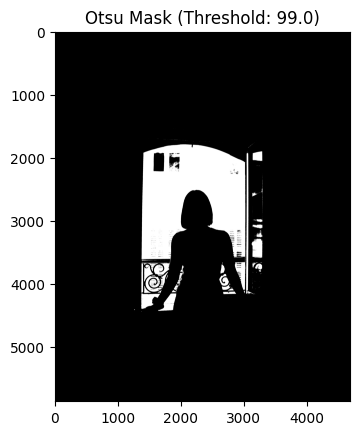

In [8]:
plt.imshow(mask, cmap='gray')
plt.title(f'Otsu Mask (Threshold: {tresh})')
plt.show()

In [9]:
def manual_hist_equalization(f):
    M, N = f.shape
    L = 256
    hist, _ = np.histogram(f.flatten(), bins=L, range=[0, L])
    cdf = hist.cumsum()
    t = np.array([(L - 1) / (M * N) * cdf[k] for k in range(L)], dtype=np.uint8)
    g = t[f]
    return g

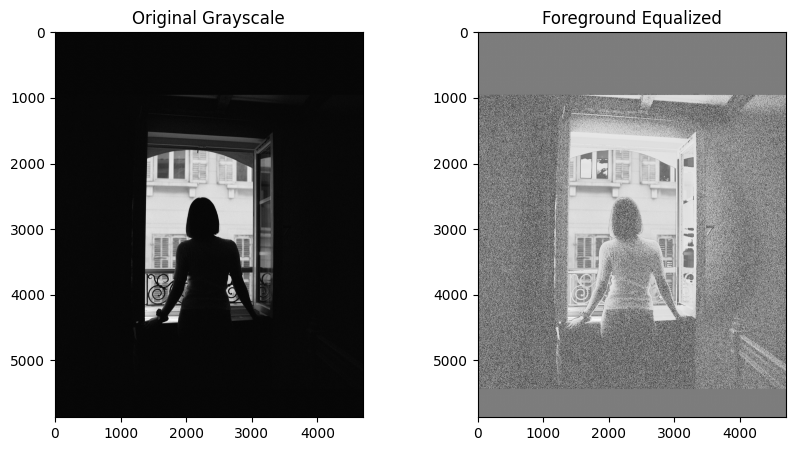

In [12]:
equalized_full = cv.equalizeHist(gray)
final_equalized_foregorund = np.where(mask == 0, equalized_full, gray)

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(gray, cmap='gray'), plt.title('Original Grayscale')
plt.subplot(1, 2, 2), plt.imshow(final_equalized_foregorund, cmap='gray'), plt.title('Foreground Equalized')
plt.show()


The automatically calculated Otsu threshold value is 99.0. This value successfully segments the image into two distinct intensity classes. (some of the parts of backgorund captured too)

By performing histogram equalization specifically on the foreground mask, we are able to see details that were previously crushed into the black shadows like roofs wood and woman's clothes wrinkles and the stair handles